# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We are trying to understand the price of used cars.

Using historic used car data, we want to identify what factors are the best indicators of used car prices.

Using the best model we build using the model, we believe that any car dealership can offer competitive prices on used cars. 

Consumers also benefit because they can now purchase used cars at reasonable and fair prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
pip install category_encoders

In [421]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime

from category_encoders import TargetEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [702]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings('ignore')

In [160]:
vehicles = pd.read_csv('data/vehicles.csv')

In [45]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [46]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [48]:
vehicles.shape

(426880, 18)

In [49]:
vehicles.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [50]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Examine null values

In [51]:
vehicles.isnull().any()

id              False
region          False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

In [60]:
#Count null values
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Drop VIN and id as they are unique to each vehicle and don't add to the analysis

In [55]:
vehicles2 = vehicles.drop(columns=['VIN', 'id'], axis =1)

In [90]:
vehicles2.shape

(426880, 16)

Convert data types

In [56]:
vehicles2  = vehicles2.convert_dtypes()

In [57]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        426880 non-null  string
 1   price         426880 non-null  Int64 
 2   year          425675 non-null  Int64 
 3   manufacturer  409234 non-null  string
 4   model         421603 non-null  string
 5   condition     252776 non-null  string
 6   cylinders     249202 non-null  string
 7   fuel          423867 non-null  string
 8   odometer      422480 non-null  Int64 
 9   title_status  418638 non-null  string
 10  transmission  424324 non-null  string
 11  drive         296313 non-null  string
 12  size          120519 non-null  string
 13  type          334022 non-null  string
 14  paint_color   296677 non-null  string
 15  state         426880 non-null  string
dtypes: Int64(3), string(13)
memory usage: 53.3 MB


Create 'age' variable from the year

In [422]:
vehicles2['age'] = datetime.now().year - vehicles2['year']
print(datetime.now().year)

2022


Examine numeric fields stats and correlation

In [423]:
vehicles2.describe()

,price,year,odometer,age
count,4.268800e+05,425675.000000,4.224800e+05,425675.000000
mean,7.519903e+04,2011.235191,9.804333e+04,10.764809
std,1.218228e+07,9.452120,2.138815e+05,9.452120
min,0.000000e+00,1900.000000,0.000000e+00,0.000000
25%,5.900000e+03,2008.000000,3.770400e+04,5.000000
50%,1.395000e+04,2013.000000,8.554800e+04,9.000000
75%,2.648575e+04,2017.000000,1.335425e+05,14.000000
max,3.736929e+09,2022.000000,1.000000e+07,122.000000


In [427]:
vehicles2.drop('year', axis=1, inplace=True)

In [428]:
vehicles2.corr()

,price,odometer,age
price,1.000000,0.010032,0.004925
odometer,0.010032,1.000000,0.157215
age,0.004925,0.157215,1.000000


Examine price and odometer for zeroes further

In [429]:
vehicles2.eq(0).sum()

region              0
price           32895
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
drive               0
size                0
type                0
paint_color         0
state               0
age               133
dtype: int64

In [430]:
#Mode of price
statistics.mode(vehicles2.price)

0

Drop observations with price 0 or less(none in this dataset) as it doesn't make sense for modeling

In [450]:
vehicles3a = vehicles2.query("price > 0", engine ='python')

In [451]:
vehicles3a.shape

(393985, 16)

<AxesSubplot:>

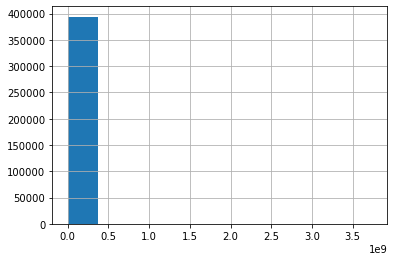

In [452]:
#Histogram of price
vehicles3a.price.hist()

Drop observations with age 0 or less(none in this dataset) as a threshold for used cars

In [453]:
vehicles3 = vehicles3a.query("age > 0", engine ='python')

In [454]:
vehicles3.shape

(392706, 16)

Check for outliers in terms of price and odometer

Text(0, 0.5, 'Price')

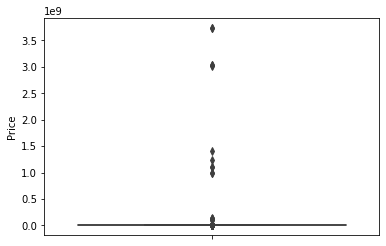

In [119]:
#Box Plot price
sns.boxplot(y='price',data=vehicles3)
plt.xticks(rotation=90)
plt.ylabel('Price')

Text(0, 0.5, 'Odometer')

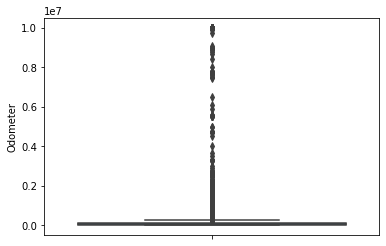

In [120]:
#Box Plot odometer
sns.boxplot(y='odometer',data=vehicles3)
plt.xticks(rotation=90)
plt.ylabel('Odometer')

Use IQR function to remove outliers

In [455]:
# Outliers Function 
cols = ['price', 'odometer'] # one or more columns

Q1 = vehicles3[cols].quantile(0.25)
Q3 = vehicles3[cols].quantile(0.75)
IQR = Q3 - Q1

vehicles4 = vehicles3[~((vehicles3[cols] < (Q1 - 1.5 * IQR)) |(vehicles3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [456]:
#Number of rows remaining
vehicles4.shape

(381376, 16)

Check box plots after removing outliers

Text(0, 0.5, 'Price')

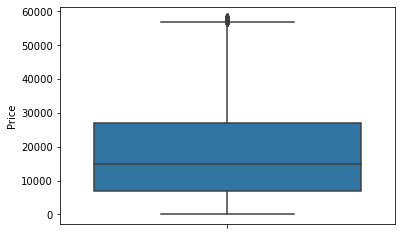

In [885]:
#Box Plot price
sns.boxplot(y='price',data=vehicles4)
plt.xticks(rotation=90)
plt.ylabel('Price')

Text(0, 0.5, 'Odometer')

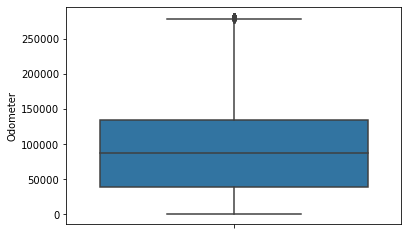

In [886]:
#Box Plot odometer
sns.boxplot(y='odometer',data=vehicles4)
plt.xticks(rotation=90)
plt.ylabel('Odometer')

Alternative method, using DBSCAN to remove outliers in price.   -------------> NOT USED

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [101]:
clusters=remove_outliers_DBSCAN((vehicles3[['price']]),0.5,5)
clusters.value_counts().sort_values(ascending=False)

-1       18750
 85       3169
 768      3129
 364      2867
 223      2837
         ...  
 3514        5
 3519        5
 2536        5
 3523        5
 4726        5
Name: cluster, Length: 4728, dtype: int64

In [102]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([   192,    193,    194,    235,    266,    285,    331,    360,
               420,    421,
            ...
            393545, 393547, 393548, 393550, 393581, 393585, 393685, 393732,
            393751, 393798],
           dtype='int64', length=18750)

In [104]:
len(ind_outlier)

18750

In [105]:
vehicles4_alt = vehicles3[~(vehicles3.index.isin(ind_outlier))]

In [107]:
vehicles4_alt.shape

(376579, 16)

Text(0, 0.5, 'Price')

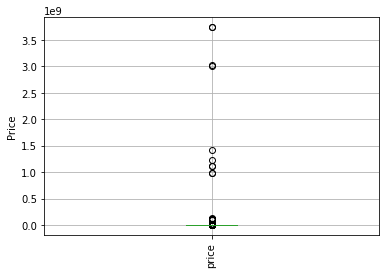

In [113]:
vehicles4_alt.boxplot('price')
plt.xticks(rotation=90)
plt.ylabel('Price')

End of DBSCAN process  -------------> NOT USED

Examine NA values

In [126]:
vehicles4.isnull().sum()

region               0
price                0
year               988
manufacturer     14536
model             4203
condition       145107
cylinders       155210
fuel              2544
odometer          2212
title_status      7521
transmission      1746
drive           116909
size            274217
type             82661
paint_color     113376
state                0
dtype: int64

In [127]:
vehicles4.isna().mean()

region          0.000000
price           0.000000
year            0.002583
manufacturer    0.038007
model           0.010989
condition       0.379406
cylinders       0.405822
fuel            0.006652
odometer        0.005784
title_status    0.019665
transmission    0.004565
drive           0.305678
size            0.716986
type            0.216131
paint_color     0.296440
state           0.000000
dtype: float64

Examine the 'size' field for NA as about 70% of data has missing value for the field

In [134]:
vehicles4.value_counts('size', dropna = False)

size
NaN            274217
full-size       56558
mid-size        31518
compact         17326
sub-compact      2839
dtype: int64

In [133]:
vehicles4['size'].unique()

<StringArray>
[<NA>, 'full-size', 'mid-size', 'compact', 'sub-compact']
Length: 5, dtype: string

We will remove any field that has less than 50% of data available before imputing.

There is some useful information in this column (size) but it's scarely populated. Could consider keeping if there is no memory/prerformance issue

In [457]:
vehicles5 = vehicles4.drop(vehicles4.columns[vehicles4.isna().mean()> 0.5], axis = 1)

In [458]:
vehicles5.columns #Size column gets dropped

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'age'],
      dtype='object')

## Impute Missing Data and Encode

Reset Index and drop some additional fields: Use higher aggregation level manufacturer(not model) and state(not region) for performance

In [ ]:
vehicles6 = vehicles5.reset_index().convert_dtypes().replace({pd.NA: np.nan})
vehicles6.drop(columns=['index','model','region'], axis =1,inplace= True)
vehicles6

In [ ]:
vehicles6.dtypes

Split data into training and test sets

In [ ]:
X, y = vehicles6.drop(columns='price'), vehicles6['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [726]:
X_train.value_counts('drive', dropna=False) #Drive has few unique values: use OneHotEncoder. For rest use Target Encoder

drive
NaN    81455
4wd    80449
fwd    67565
rwd    37494
dtype: int64

In [680]:
numeric_features = ['odometer','age']

In [681]:
oneHot_features = ['drive']

In [682]:
categorical_features = ['condition', 'cylinders', 'fuel', 'title_status','transmission', 'manufacturer', 'state',
                        'type', 'paint_color']

In [683]:
numeric_transformer = Pipeline(steps=[
    ('imputer',  IterativeImputer(random_state=42))
    #('imputer', SimpleImputer(strategy='median'))
    #,('scaler', StandardScaler())
    ])

In [684]:
oneHot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing'))
    ,('onehot', OneHotEncoder(drop = 'if_binary', sparse=False))
    ])

    #('imputer',  IterativeImputer(random_state=42)),
    #('onehot', OneHotEncoder(handle_unknown='ignore',drop = 'if_binary'))])

In [697]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing'))
    ,('target', TargetEncoder())])

#Same thing using OrdinalEncoder instead
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
#    ,('ordinal', OrdinalEncoder())])

In [698]:
#preprocessor = ColumnTransformer(
preprocessor = make_column_transformer((numeric_transformer, numeric_features),
                                       (categorical_transformer, categorical_features),
                                       (oneHot_transformer, oneHot_features),
                                       remainder = "drop")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Basic Models for benchmark

Linear Regression

In [718]:
pipe = Pipeline([('preprocessor', preprocessor),
                 ('regression', LinearRegression())
               ])
pipe.fit(X_train, y_train)
mse_train2 = mean_squared_error(y_train, pipe.predict(X_train))
mse_test2 = mean_squared_error(y_test, pipe.predict(X_test))
print('Linear Reg MSE train:', mse_train2)
print('Linear Reg MSE test :', mse_test2)
print('The R2 score is:', pipe.score(X_test,y_test))
pipe

Linear Reg MSE train: 74317408.04531045
Linear Reg MSE test : 74916482.32898577
The R2 score is: 0.5427530679376411


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42))]),
                                                  ['odometer', 'age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission',
                                                   'manufacturer', 'state',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['drive'])])),
                ('regression', LinearRegression())])

Ridge

In [719]:
pipe0 = Pipeline([('preprocessor', preprocessor),
                  ('regressor', Ridge())])
pipe0.fit(X_train, y_train)
mse_train2 = mean_squared_error(y_train, pipe0.predict(X_train))
mse_test2 = mean_squared_error(y_test, pipe0.predict(X_test))
print('Ridge MSE train:', mse_train2)
print('Ridge MSE test :', mse_test2)
print('The R2 score is:', pipe0.score(X_test,y_test))
pipe0

Ridge MSE train: 74317408.04588023
Ridge MSE test : 74916484.52984537
The R2 score is: 0.5427530545048656


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42))]),
                                                  ['odometer', 'age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission',
                                                   'manufacturer', 'state',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['drive'])])),
                ('regressor', Ridge())])

Lasso for feature Selection and apply to Linear Regression

In [720]:
pipe1 = Pipeline([('preprocessor', preprocessor),
    ('sfs', SequentialFeatureSelector(n_features_to_select = 4, estimator=Lasso())),
    ('regression', LinearRegression())
])
pipe1.fit(X_train, y_train)
mse_train2 = mean_squared_error(y_train, pipe1.predict(X_train))
mse_test2 = mean_squared_error(y_test, pipe1.predict(X_test))
print('SFS with LASSO MSE train:', mse_train2)
print('SFS with LASSO MSE test :', mse_test2)
print('The R2 score is:', pipe1.score(X_test,y_test))
pipe1

SFS with LASSO MSE train: 86509276.415559
SFS with LASSO MSE test : 87480537.46430765
The R2 score is: 0.4660693331133017


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42))]),
                                                  ['odometer', 'age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission',
                                                   'manufacturer', 'state',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['drive'])])),
                ('sfs',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('regression', LinearRegression())])

Lasso

In [760]:
# Lasso by itself
pipe_lasso = Pipeline([('preprocessor', preprocessor),
                  ('regressor', Lasso())]) # default alpha = 1
pipe_lasso.fit(X_train, y_train)
print(list(zip(X_train.columns, pipe_lasso['regressor'].coef_)))
print('The R2 score is:', pipe_lasso.score(X_test,y_test))
pipe_lasso

[('manufacturer', -0.08565954935532444), ('condition', -299.0395439552127), ('cylinders', 0.18053630956340347), ('fuel', 0.42001410882243356), ('odometer', 0.560653513956075), ('title_status', 0.5468612051756497), ('transmission', 0.002997722385016729), ('drive', 0.4334041799648083), ('type', 0.5619418627103584), ('paint_color', 0.49985118949638685), ('state', 0.14106840331805068), ('age', -0.0)]
The R2 score is: 0.5427507626877753


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42))]),
                                                  ['odometer', 'age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission',
                                                   'manufacturer', 'state',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['drive'])])),
                ('regressor', Lasso())])

Linear Regression, Ridge and Lasso perform roughly the same. When selecting features using LASSO and applying it to Linear Regression it performs a bit worse.

## Models

Model 1

In [722]:
 pipe2 = Pipeline([('preprocessor', preprocessor),
                  ('poly_features',(PolynomialFeatures(degree=2, include_bias=False))),
                  ('scaler', StandardScaler()),
                  ('regressor', Ridge())])

In [723]:
 pipe2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42))]),
                                                  ['odometer', 'age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission',
                                                   'manufacturer', 'state',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['drive'])])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('regressor', Ridge())])

In [894]:
mse_train2 = mean_squared_error(y_train, pipe2.predict(X_train))
mse_test2 = mean_squared_error(y_test, pipe2.predict(X_test))
print('SFS with LASSO MSE train:', mse_train2)
print('SFS with LASSO MSE test :', mse_test2)
print('The R2 score is:', pipe2.score(X_test,y_test))

SFS with LASSO MSE train: 58223095.4375152
SFS with LASSO MSE test : 58765939.23884018
The R2 score is: 0.6413266534762773


### Grid Search CV - To find best model

Get indices for GridSearchCV

In [727]:
training_indices = (pd.DataFrame(X_train).index)
training_indices

Int64Index([257221, 333264, 326473, 293211, 182656, 197089,   9030, 319935,
             67506, 310387,
            ...
            137337,  54886, 207892, 110268, 119879, 259178, 365838, 131932,
            146867, 121958],
           dtype='int64', length=266963)

In [728]:
test_indices = (pd.DataFrame(X_test).index)
test_indices

Int64Index([ 21683, 310950, 260878, 167058, 351007, 163164, 301310, 233631,
            254153, 106125,
            ...
            327003, 344096, 187760, 252400, 364525, 110185, 247730,  83083,
              3286, 128697],
           dtype='int64', length=114413)

In [729]:
params_to_try = {'regressor__alpha': [0.01,0.1,1,10,100,1000]}

In [731]:
pipe3 = Pipeline([('preprocessor', preprocessor),
                  ('poly_features',(PolynomialFeatures(degree=2, include_bias=False))),
                  ('scaler', StandardScaler()),
                  ('regressor', Ridge())])

In [742]:
model_finder = GridSearchCV(estimator = pipe3,
                           param_grid = params_to_try,
                           scoring = ["neg_mean_squared_error", 'r2'], refit='r2',
                           cv = [[training_indices, test_indices]])

Grid Search CV - Using Log Transformation on the target 'price'

In [743]:
model_finder.fit(X,np.log1p(y)) # We transform target using natural log before fitting model

GridSearchCV(cv=[[Int64Index([257221, 333264, 326473, 293211, 182656, 197089,   9030, 319935,
             67506, 310387,
            ...
            137337,  54886, 207892, 110268, 119879, 259178, 365838, 131932,
            146867, 121958],
           dtype='int64', length=266963),
                  Int64Index([ 21683, 310950, 260878, 167058, 351007, 163164, 301310, 233631,
            254153, 106125,
            ...
            327003, 344096, 187760, 252400, 364525, 110185, 247730,  83083,
              3286, 128697]...
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        sparse=False))]),
                                                                         ['drive'])])),
                                       ('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [745]:
best_model = model_finder.best_estimator_
model_finder.cv_results_

{'mean_fit_time': array([5.40378404, 5.08030844, 5.11777759, 5.06895638, 5.128901  ,
        5.17256808]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.78436637, 0.72143674, 0.7088027 , 0.75270438, 0.7834053 ,
        0.72157836]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_regressor__alpha': masked_array(data=[0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regressor__alpha': 0.01},
  {'regressor__alpha': 0.1},
  {'regressor__alpha': 1},
  {'regressor__alpha': 10},
  {'regressor__alpha': 100},
  {'regressor__alpha': 1000}],
 'split0_test_neg_mean_squared_error': array([-0.98364946, -0.9837718 , -0.98440542, -0.98697951, -1.00060168,
        -1.01936672]),
 'mean_test_neg_mean_squared_error': array([-0.98364946, -0.9837718 , -0.98440542, -0.98697951, -1.00060168,
        -1.01936672]),
 'std_test_neg_mean_squared_error': array

Grid Search CV - Without log transformation of target

In [746]:
model_finder.fit(X,y) # Fit without log transform

GridSearchCV(cv=[[Int64Index([257221, 333264, 326473, 293211, 182656, 197089,   9030, 319935,
             67506, 310387,
            ...
            137337,  54886, 207892, 110268, 119879, 259178, 365838, 131932,
            146867, 121958],
           dtype='int64', length=266963),
                  Int64Index([ 21683, 310950, 260878, 167058, 351007, 163164, 301310, 233631,
            254153, 106125,
            ...
            327003, 344096, 187760, 252400, 364525, 110185, 247730,  83083,
              3286, 128697]...
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        sparse=False))]),
                                                                         ['drive'])])),
                                       ('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [747]:
best_model1 = model_finder.best_estimator_
model_finder.cv_results_

{'mean_fit_time': array([5.16315246, 5.02787781, 5.07544756, 5.07495332, 5.12175298,
        5.15994167]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.73703694, 0.70619249, 0.71425009, 0.78434777, 0.80001926,
        0.72131252]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_regressor__alpha': masked_array(data=[0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regressor__alpha': 0.01},
  {'regressor__alpha': 0.1},
  {'regressor__alpha': 1},
  {'regressor__alpha': 10},
  {'regressor__alpha': 100},
  {'regressor__alpha': 1000}],
 'split0_test_neg_mean_squared_error': array([-58765948.40583091, -58765935.24614283, -58765939.23884018,
        -58776504.96347149, -59046772.92071968, -59838164.65544808]),
 'mean_test_neg_mean_squared_error': array([-58765948.40583091, -58765935.24614283, -58765939.23884018,
        -58776504.96347149,

In [748]:
model_finder.best_score_

0.6413266778453954

#### Since we found model without log transformation of target with alpha=0.1 to be the best. We compute permutation importance for Ridge model with alpha = 0.1 after applying all transformations

In [750]:
features = [c for c in ['manufacturer','condition','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state','age'] if c in X_train.columns]
pipe = Pipeline([('preprocessor', preprocessor),
                  ('poly_features',(PolynomialFeatures(degree=2, include_bias=False))),
                  ('scaler', StandardScaler()),
                  ('regressor', Ridge(alpha = 0.1))])

model = pipe.fit(X_train, y_train)
# score with test set
print('model r^2 :', model.score(X_test, y_test))
# permutation importance
r = permutation_importance(model, X_test, y_test, n_repeats = 50, random_state = 93)
print('importance:', r.importances_mean)
pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(
        by = "Importance", ascending = False)

model r^2 : 0.6413266778453954
importance: [0.04381244 0.02862781 0.05894518 0.08394188 0.19742747 0.00888315
 0.02170606 0.04201124 0.0564302  0.00143146 0.01361455 0.31154223]


,Column,Importance
11,age,0.311542
4,odometer,0.197427
3,fuel,0.083942
2,cylinders,0.058945
8,type,0.056430
0,manufacturer,0.043812
7,drive,0.042011
1,condition,0.028628
6,transmission,0.021706
10,state,0.013615


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Adjusted model

We see that paint_color and title_status are not as important (<10% importance). We will exclude those 2 columns in our future modeling.

In [775]:
categorical_features1 = ['condition', 'cylinders', 'fuel', 'transmission', 'manufacturer', 'state', 'type']

In [776]:
preprocessor1 = make_column_transformer((numeric_transformer, numeric_features),
                                       (categorical_transformer, categorical_features1),
                                       (oneHot_transformer, oneHot_features),
                                       remainder = "drop")

In [777]:
pipe4 = Pipeline([('preprocessor1', preprocessor1),
                  ('poly_features',(PolynomialFeatures(degree=2, include_bias=False))),
                  ('scaler', StandardScaler()),
                  ('regressor', Ridge())])

In [778]:
model_finder = GridSearchCV(estimator = pipe4,
                           param_grid = params_to_try,
                           scoring = ["neg_mean_squared_error", 'r2'], refit='r2',
                           cv = [[training_indices, test_indices]])

In [779]:
#Remove features with low importance and fit model
X1 = X.drop(['paint_color','title_status'], axis=1)
model_finder.fit(X1,y)

GridSearchCV(cv=[[Int64Index([257221, 333264, 326473, 293211, 182656, 197089,   9030, 319935,
             67506, 310387,
            ...
            137337,  54886, 207892, 110268, 119879, 259178, 365838, 131932,
            146867, 121958],
           dtype='int64', length=266963),
                  Int64Index([ 21683, 310950, 260878, 167058, 351007, 163164, 301310, 233631,
            254153, 106125,
            ...
            327003, 344096, 187760, 252400, 364525, 110185, 247730,  83083,
              3286, 128697]...
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        sparse=False))]),
                                                                         ['drive'])])),
                                       ('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [896]:
best_model = model_finder.best_estimator_
model_finder.cv_results_

{'mean_fit_time': array([4.31562614, 4.02383661, 4.002002  , 3.93019915, 4.1906271 ,
        4.07324719]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.66118073, 0.58324552, 0.56508088, 0.6277585 , 0.5961597 ,
        0.613096  ]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_regressor__alpha': masked_array(data=[0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regressor__alpha': 0.01},
  {'regressor__alpha': 0.1},
  {'regressor__alpha': 1},
  {'regressor__alpha': 10},
  {'regressor__alpha': 100},
  {'regressor__alpha': 1000}],
 'split0_test_neg_mean_squared_error': array([-59394175.54750731, -59394188.15516831, -59394428.12654306,
        -59405765.25080516, -59662696.05564089, -60400217.49066035]),
 'mean_test_neg_mean_squared_error': array([-59394175.54750731, -59394188.15516831, -59394428.12654306,
        -59405765.25080516,

Even after excluding these two columns, we get a R2 of about .63 meaning 63% of the variation is explained by our model. The best R2 is obtained with alpha = 0.01.

In [891]:
r = permutation_importance(best_model, X1, y, n_repeats = 50, random_state = 93)
print('importance:', r.importances_mean)
pd.DataFrame({"Column":X1.columns, "Importance":r.importances_mean}).sort_values(
        by = "Importance", ascending = False)

importance: [0.04522502 0.03025452 0.06006291 0.08451121 0.19334099 0.02174225
 0.04314349 0.05796849 0.01365548 0.32120401]


,Column,Importance
9,age,0.321204
4,odometer,0.193341
3,fuel,0.084511
2,cylinders,0.060063
7,type,0.057968
0,manufacturer,0.045225
6,drive,0.043143
1,condition,0.030255
5,transmission,0.021742
8,state,0.013655


Cross Validation

In [893]:
#Cross Validation
result = cross_val_score(best_model, X1, y,  cv=3)
print(result)

[0.60109648 0.64947036 0.62237556]


Prediction on test data

In [901]:
y_predicted = model_finder.predict(X_test.drop(['paint_color','title_status'], axis=1))

Plot true vs predicted prices

(-2921.15, 127410.96666187714, -31480.491578392943, 98851.62508348419)

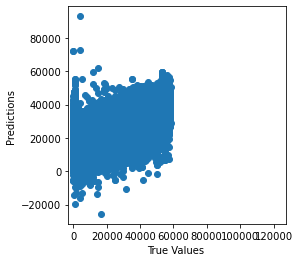

In [919]:
g=plt.scatter(y_test, y_predicted)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')
#p1 = max(max(predicted_value), max(true_value))
#p2 = min(min(predicted_value), min(true_value))
#plt.plot([p1, p2], [p1, p2], 'b-')

Plot difference in true vs predicted prices

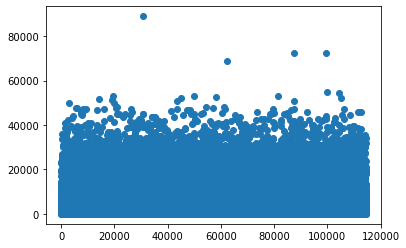

In [925]:
#PLot absolute value of differences 
y_diff=np.array(y_test - y_predicted)
g = plt.plot(abs(y_diff),marker='o',linestyle='')

Plot Histogram of prediction errors

Text(0, 0.5, 'Frequency')

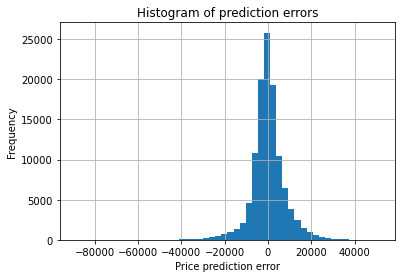

In [924]:
diff = y_test - y_predicted
diff.hist(bins = 50)
plt.title('Histogram of prediction errors')
plt.xlabel('Price prediction error')
plt.ylabel('Frequency')

Plot true vs predicted prices using log scale

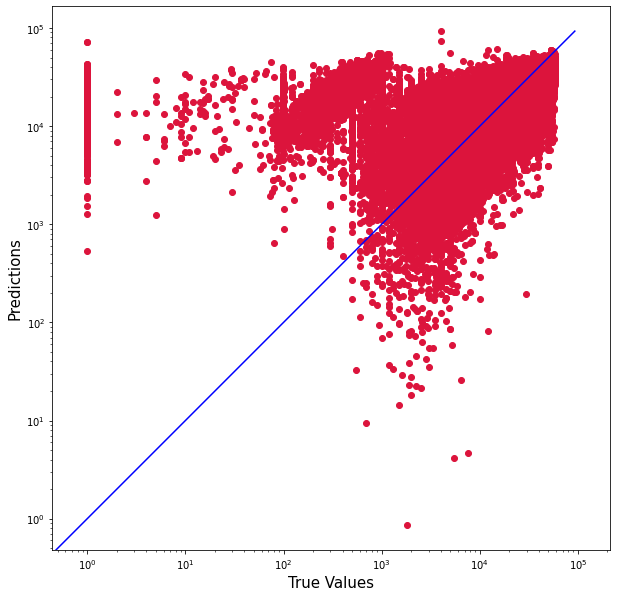

In [910]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predicted), max(y_test))
p2 = min(min(y_predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

We have our final adjusted model and done cross validation on it after dropping the low importance features. We have the top 10 features that have an impact on price of used cars with age(current year - manufacture year) and odometer(miles driven) being the top two features. The model overall explains more than 60% of the variation in used car prices.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Based on our dataset and current models, we have a model that will predict about 62% variation in used car prices.

Age of car(Current year - Manufacture year) and odometer(miles driven) are the top two important features that determine used car prices. Newer and less driven cars have higher prices.

You can use this model to predict the price of used cars. I recommend in the future selecting cars whose actual values are less than the values predicted by this model so that you can maximize the profit. YOu can buy cars for lower price than it is worth to keep in inventory.

In the future, we can apply more advanced modeling techniques like Logistic Regression, XGBoost, RandomForest and such to improve the performance of our model.